In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [3]:
df = pd.read_csv(r"C:\Users\Shuvam\Downloads\LoanData.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df['Total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']


In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [6]:
df.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [7]:
continous = ['Total_income','LoanAmount']
discrete_categorical = ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
discrete_count = ['Dependents','Loan_Amount_Term']

 # Data Understanding

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    object 
 1   Gender            601 non-null    object 
 2   Married           611 non-null    object 
 3   Dependents        599 non-null    object 
 4   Education         614 non-null    object 
 5   Self_Employed     582 non-null    object 
 6   LoanAmount        592 non-null    float64
 7   Loan_Amount_Term  600 non-null    float64
 8   Credit_History    564 non-null    float64
 9   Property_Area     614 non-null    object 
 10  Loan_Status       614 non-null    object 
 11  Total_income      614 non-null    float64
dtypes: float64(4), object(8)
memory usage: 57.7+ KB


In [9]:
df[continous].describe()

,Total_income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


In [10]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [11]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [12]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [14]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [15]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [16]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [18]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [19]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [20]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [21]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [22]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [23]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [24]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [25]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [26]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [27]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [28]:
df.isnull().sum()

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Total_income         0
dtype: int64

**check for skewness**

<Axes: xlabel='LoanAmount', ylabel='Count'>

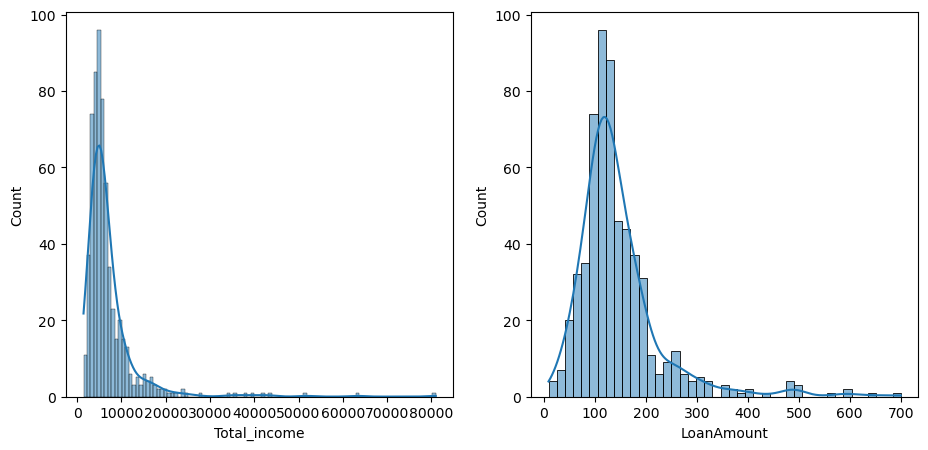

In [29]:
plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
sns.histplot(df['Total_income'],kde=1)


plt.subplot(1,2,2)
sns.histplot(df['LoanAmount'],kde=1)

In [30]:
df[continous].skew()

Total_income    5.633449
LoanAmount      2.677552
dtype: float64

**check for outliers**

<Axes: ylabel='LoanAmount'>

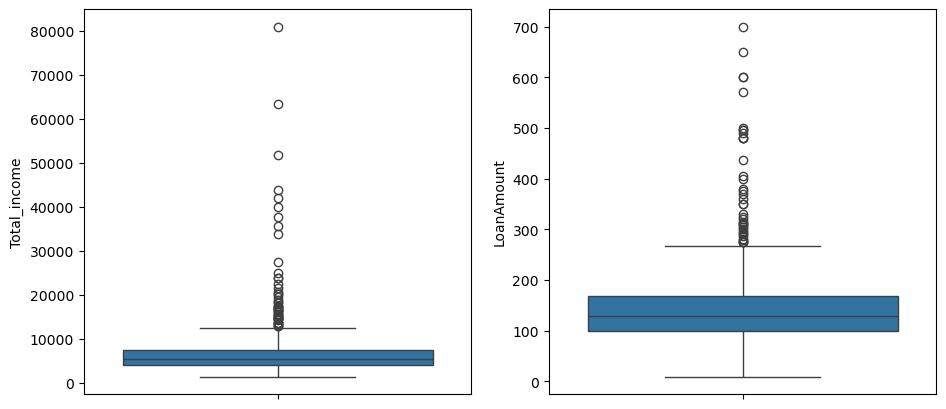

In [31]:
plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
sns.boxplot(df['Total_income'])

plt.subplot(1,2,2)
sns.boxplot(df['LoanAmount'])

In [32]:
df[continous].corr()

,Total_income,LoanAmount
Total_income,1.000000,0.624621
LoanAmount,0.624621,1.000000


<Axes: >

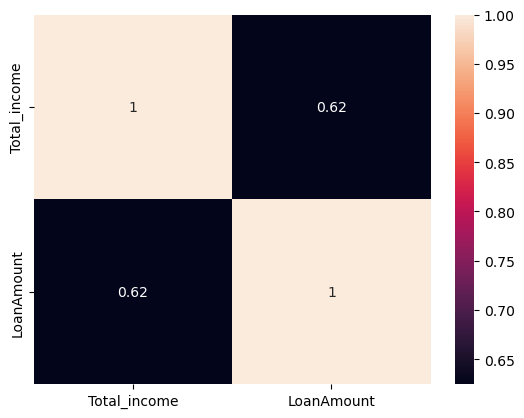

In [33]:
sns.heatmap(df[continous].corr(),annot=True)

<Axes: xlabel='Loan_Status', ylabel='count'>

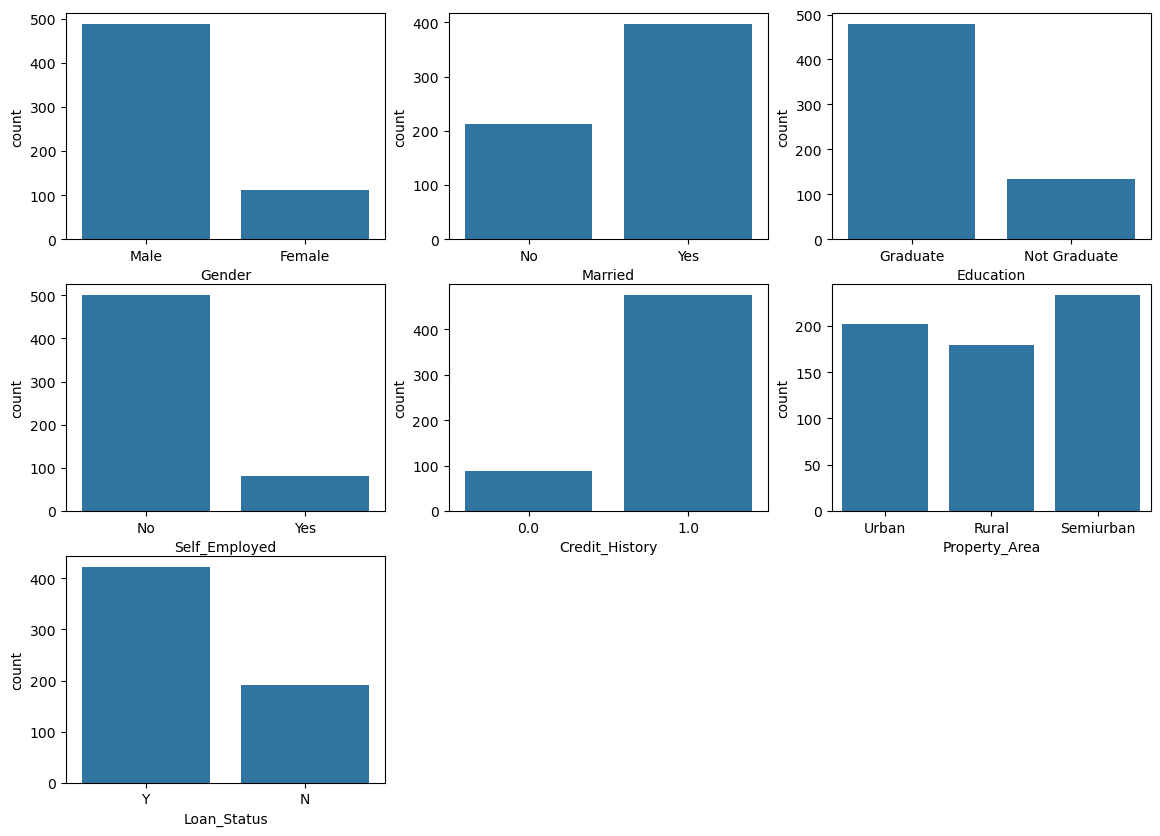

In [34]:
plt.figure(figsize=(14,10))

plt.subplot(3,3,1)
sns.countplot(x=df['Gender'])

plt.subplot(3,3,2)
sns.countplot(x=df['Married'])

plt.subplot(3,3,3)
sns.countplot(x=df['Education'])

plt.subplot(3,3,4)
sns.countplot(x=df['Self_Employed'])

plt.subplot(3,3,5)
sns.countplot(x=df['Credit_History'])

plt.subplot(3,3,6)
sns.countplot(x=df['Property_Area'])

plt.subplot(3,3,7)
sns.countplot(x=df['Loan_Status'])

In [35]:
df['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

# Data Preprocessing

**missing values treatment** 

In [36]:
# Using mode() because of descrete column

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])/12

In [37]:
# wrong value,data type change

df['Dependents'] = df['Dependents'].replace({'3+':'3'}) 
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Dependents'] = df['Dependents'].astype('int')

In [38]:
# why i didnt replaced with mean is because of business problem
# we cannot give mean values to this continous columns
# so i just dropped null values

df =  df.dropna(subset=['LoanAmount','Total_income'])

In [39]:
df.isnull().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Total_income        0
dtype: int64

In [40]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
219,LP001734,Female,Yes,2,Graduate,No,127.0,30.0,1.0,Semiurban,Y,6666.0
587,LP002917,Female,No,0,Not Graduate,No,70.0,30.0,1.0,Semiurban,Y,2165.0
71,LP001245,Male,Yes,2,Not Graduate,Yes,97.0,30.0,1.0,Semiurban,Y,3750.0
109,LP001384,Male,Yes,3,Not Graduate,No,94.0,40.0,1.0,Semiurban,Y,2825.0
411,LP002319,Male,Yes,0,Graduate,No,160.0,30.0,1.0,Urban,Y,6256.0
467,LP002501,Male,Yes,0,Graduate,No,110.0,30.0,1.0,Semiurban,Y,16692.0
313,LP002008,Male,Yes,2,Graduate,Yes,144.0,7.0,1.0,Rural,Y,5746.0
553,LP002788,Male,Yes,0,Not Graduate,No,181.0,30.0,0.0,Urban,N,4787.0
215,LP001720,Male,Yes,3,Not Graduate,No,100.0,30.0,1.0,Semiurban,Y,4833.0
105,LP001367,Male,Yes,1,Graduate,No,100.0,30.0,1.0,Urban,Y,4082.0


**Outliers**

In [41]:
# In this dataset we dont need to treat because of business problem 

**Transformation(Skewness Treatment)**

In [42]:
from scipy.stats import boxcox
df['LoanAmount'],a = boxcox(df['LoanAmount'])
df['Total_income'],b = boxcox(df['Total_income'])

C:\Users\Shuvam\AppData\Local\Temp\ipykernel_26724\1602151040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LoanAmount'],a = boxcox(df['LoanAmount'])
C:\Users\Shuvam\AppData\Local\Temp\ipykernel_26724\1602151040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_income'],b = boxcox(df['Total_income'])


In [43]:
df[continous].skew()

Total_income   -0.030424
LoanAmount      0.025572
dtype: float64

In [44]:
df.drop(columns=['Loan_ID'],inplace = True)

C:\Users\Shuvam\AppData\Local\Temp\ipykernel_26724\2915362204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Loan_ID'],inplace = True)


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592 entries, 1 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            592 non-null    object 
 1   Married           592 non-null    object 
 2   Dependents        592 non-null    int32  
 3   Education         592 non-null    object 
 4   Self_Employed     592 non-null    object 
 5   LoanAmount        592 non-null    float64
 6   Loan_Amount_Term  592 non-null    float64
 7   Credit_History    592 non-null    float64
 8   Property_Area     592 non-null    object 
 9   Loan_Status       592 non-null    object 
 10  Total_income      592 non-null    float64
dtypes: float64(4), int32(1), object(6)
memory usage: 53.2+ KB


**Encoding**

In [46]:
df = pd.get_dummies(df,columns=['Gender','Married','Education','Self_Employed','Property_Area'],drop_first = True,dtype='int')

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [48]:
df.to_csv('Loan Elgible status.csv',index=False)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592 entries, 1 to 613
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               592 non-null    int32  
 1   LoanAmount               592 non-null    float64
 2   Loan_Amount_Term         592 non-null    float64
 3   Credit_History           592 non-null    float64
 4   Loan_Status              592 non-null    int32  
 5   Total_income             592 non-null    float64
 6   Gender_Male              592 non-null    int32  
 7   Married_Yes              592 non-null    int32  
 8   Education_Not Graduate   592 non-null    int32  
 9   Self_Employed_Yes        592 non-null    int32  
 10  Property_Area_Semiurban  592 non-null    int32  
 11  Property_Area_Urban      592 non-null    int32  
dtypes: float64(4), int32(8)
memory usage: 41.6 KB
